In [73]:
import glob
import numpy as np
import scipy.special
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
import pandas as pd
import becquerel as bq
from becquerel import Spectrum
import scipy.integrate as integrate
import math as m

In [ ]:
UCB037_Seawater                  42.66356408020597                     0.9558928798201024
UCB048_Seaweed                  1956.6767387772368                   13.29376579786686
UCB052_Rain_Water               0.4483635177520459                   0.24372340161480388
UCB067_Halibut                      712.4520222508808                     8.269842980683297
UCB068_SwordFish                 533.1155329121966                     5.114437873961484

In [16]:
results = pd.read_csv(r'C:\Users\ahanks\Downloads\PF\K-40 Activities.txt')
results

,Sample,Activity1,Unc1,Activity2,Unc2,Activity3,Unc3
0,Seawater,41.695302,0.958913,42.663564,0.955893,32.253782,1.029861
1,Seaweed,1951.969580,13.298905,1956.676739,13.293766,1906.070116,13.423695
2,Rain_Water,-0.032402,0.246631,0.448364,0.243723,-4.720347,0.309214
3,Halibut,707.257481,8.279899,712.452022,8.269843,656.605550,8.521606
4,SwordFish,530.271049,5.119314,533.115533,5.114438,502.534504,5.236899


In [40]:
A1 = results['Activity1'].to_numpy()
A2 = results['Activity2'].to_numpy()
A3 = results['Activity3'].to_numpy()

Act = np.stack([A1,A2,A3])

Act_ave = np.mean(Act,axis=0)
Act_std = np.std(Act,axis=0)

print('mean Activity = ',Act_ave)
print('Act. sys error = ',Act_std)

mean Activity =  [ 3.88708825e+01  1.93823881e+03 -1.43479518e+00  6.92105018e+02
  5.21973695e+02]
Act. sys error =  [ 4.69566466 22.82773293  2.33151175 25.19133403 13.79454954]
[4.35665471e+01 1.96106654e+03 8.96716565e-01 7.17296352e+02
 5.35768245e+02] [  34.17521779 1915.41107864    0.          666.91368379  508.17914546]


In [42]:
x_values = ['UCB037_Seawater','UCB048_Seaweed','UCB052_Rain_Water','UCB067_Halibut','UCB068_SwordFish']
y_values = [42.66356408020597,1956.6767387772368,0.4483635177520459,712.4520222508808,533.1155329121966]
y_errors = [0.9558928798201024,13.29376579786686,0.24372340161480388,8.269842980683297,5.114437873961484]

Act_std_up = Act_ave + Act_std - y_values
Act_std_low = y_values - (Act_ave - Act_std)
Act_std_low_cut = Act_std_low.clip(min=0)
print(Act_std_up,Act_std_low_cut)

[0.90298304 4.38980573 0.44835305 4.8443296  2.65271163] [ 8.48834629 41.26566013  4.21467045 45.53833846 24.93638745]


In [48]:
fig = go.Figure(
        data=[
            go.Scatter(
                x=results['Sample'],
                y=y_values,
                mode='markers',
                marker=dict(size=10,
                            color=0),
                error_y=dict(
                    type='data', # value of error bar given in data coordinates
                    array=y_errors,
                    visible=True)),
            go.Scatter(
                x=results['Sample'],
                y=y_values,
                mode='markers',
                marker=dict(size=1,
                            color=0),
                error_y=dict(
                    type='data', # value of error bar given in data coordinates
                    array=Act_std_up,
                    arrayminus=Act_std_low_cut,
                    visible=True))
        ])
fig.show()

In [52]:
print(x_values)

['UCB037_Seawater',
 'UCB048_Seaweed',
 'UCB052_Rain_Water',
 'UCB067_Halibut',
 'UCB068_SwordFish']

In [95]:
# Old results
old_values = [31.01, 1715.54, 0.03, 623.4, 466.58]
old_unc = [1.36, 22.03, 0.35, 12.87, 8.3]
old_Bi = [-0.32, 1.28,0.01,-0.65,-0.17]
old_Bi_unc = [0.23,2.05,0.15,1.73,1.01]
old_Tl = [-1.17,0.13,0.01,-0.48,-0.36]
old_Tl_unc = [0.13,1.16,0.11,1.15,0.64]
old_results = np.array([old_values,old_unc,old_Bi,old_Bi_unc,old_Tl,old_Tl_unc])
old_df = pd.DataFrame(old_results, index=['K-40','K-40 unc','Bi-214','Bi-214 unc','Tl-208','Tl-208 unc'], columns = results['Sample'])

seaweed_data = [1715.54,1.28,0.13]
seaweed_unc = [22.03,2.05,1.16]

In [91]:
old_results_strings = [
    ['31.01 +/- 1.36','1715.54 +/- 22.03','0.03 +/- 0.35','623.4 +/- 12.87','466.58 +/- 8.3'],
    ['-0.32 +/- 0.23','1.28 +/- 2.05','0.01 +/- 0.15','-0.65 +/- 1.73','-0.17 +/- 1.01'],
    ['-1.17 +/- 0.13','0.13 +/- 1.16','0.01 +/- 0.11','-0.48 +/- 1.15','-0.36 +/- 0.64']
]
old_df_nice = pd.DataFrame(old_results_strings, index=['K-40','Bi-214','Tl-208'],columns=results['Sample'])
old_df_nice

Sample,Seawater,Seaweed,Rain_Water,Halibut,SwordFish
K-40,31.01 +/- 1.36,1715.54 +/- 22.03,0.03 +/- 0.35,623.4 +/- 12.87,466.58 +/- 8.3
Bi-214,-0.32 +/- 0.23,1.28 +/- 2.05,0.01 +/- 0.15,-0.65 +/- 1.73,-0.17 +/- 1.01
Tl-208,-1.17 +/- 0.13,0.13 +/- 1.16,0.01 +/- 0.11,-0.48 +/- 1.15,-0.36 +/- 0.64


In [92]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='New Analysis',
    x=results['Sample'], 
    y=y_values,
    error_y=dict(type='data', array=Act_std_up, arrayminus=Act_std_low_cut)
))
fig.add_trace(go.Bar( 
    name='Old Analysis',
    x=results['Sample'], 
    y=old_values,
    error_y=dict(type='data', array=old_unc)
))

fig.update_layout(yaxis_type="log")
fig.update_layout(plot_bgcolor='white')#,width=700, height=700)
fig.update_yaxes(showgrid=True,gridcolor='black',linecolor='black',tickcolor='black',
                 tickfont=dict(color='black', size=16))
fig.update_xaxes(linecolor='black',tickfont=dict(color='black', size=16))
fig.update_layout(legend_orientation="h",legend=dict(x=0.5, y=1.05))
fig.update_layout(barmode='group')

fig.show()

In [69]:
def eff_func(x):
    ln_eff = np.log(0.0091896) - 0.5023278*np.log(x/1460) + 0.44293 * np.power(np.log(x/1460),2) + 0.1724361 * np.power(np.log(x/1460),3)
    return np.exp(ln_eff)

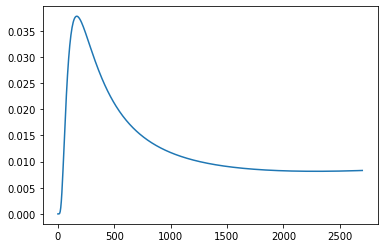

In [70]:
# Efficiency plot...
x = np.linspace(1, 2700, 540)
plt.plot(x,eff_func(x))

In [72]:
eff_func(1460)

0.009189600000000001

In [74]:
spectrum = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\UCB048_Seaweed.Spe'
background = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\2.26.17_background.Spe'

spec = Spectrum.from_file(spectrum) #import spectrum from file
len(spec)
bg = Spectrum.from_file(background)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\UCB048_Seaweed.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\2.26.17_background.Spe


In [80]:
fig = go.Figure(
        data=[
            go.Scatter(
                x=spec.energies_kev,
                y=spec.counts_vals,
                error_y=dict(
                    type='data', # value of error bar given in data coordinates
                    array=y_errors,
                    visible=True))
        ])
fig.update_layout(yaxis_type="log")
fig.update_layout(plot_bgcolor='white')#,width=700, height=700)
fig.update_yaxes(showgrid=True,gridcolor='black',linecolor='black',tickcolor='black',
                 tickfont=dict(color='black', size=16))
fig.update_xaxes(linecolor='black',tickfont=dict(color='black', size=16))

fig.show()

In [97]:
seaweed_results = pd.read_csv(r'C:\Users\ahanks\Downloads\PF\UCB_048Seaweed.txt')
seaweed_results

,Isotopes,Activity,Uncertainty
0,K-40,2129.229497,14.466098
1,Bi-214,1.230706,0.309379
2,Tl-208,0.126453,0.184640


In [99]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='New Analysis',
    x=seaweed_results['Isotopes'], 
    y=seaweed_results['Activity'],
    error_y=dict(type='data', array=seaweed_results['Uncertainty']*4.0)
))
fig.add_trace(go.Bar(
    name='Old Analysis',
    x=seaweed_results['Isotopes'], 
    y=seaweed_data,
    error_y=dict(type='data', array=seaweed_unc)
))

fig.update_layout(yaxis_type="log")
fig.update_layout(plot_bgcolor='white')#,width=700, height=700)
fig.update_yaxes(showgrid=True,gridcolor='black',linecolor='black',tickcolor='black',
                 tickfont=dict(color='black', size=16))
fig.update_xaxes(linecolor='black',tickfont=dict(color='black', size=16))
fig.update_layout(legend_orientation="h",legend=dict(x=0.5, y=1.05))
fig.update_layout(barmode='group')

fig.show()

In [101]:
isotopes = ['Lu-176','La-138','K-40']
energies = ['88.34, 201.83, 306.78','788.742,1435.795','1460.83']

efficiency_peaks = pd.DataFrame({'Isotopes': isotopes, 'Peak Energies': energies})
efficiency_peaks


,Isotopes,Peak Energies
0,Lu-176,"88.34, 201.83, 306.78"
1,La-138,"788.742,1435.795"
2,K-40,1460.83
